In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date,timedelta
import itertools

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

import seaborn as sns
sns.set(style = 'ticks')

In [86]:
# reading the data from the excel file
data = pd.read_csv('C:/Users/Jewin/Desktop/Jovita-DataSciene/DATA/Capstone/Online Retail_Test.csv')

#or below link to get data for evaluation period
#data = pd.read_csv('C:/Users/Jewin/Desktop/Jovita-DataSciene/DATA/Capstone/Online Retail_Evaluation.csv')

In [87]:
data

,CustomerID,InvoiceDate,Recency,Frequency,Payment,Recency_RANK,PCNT_RANK,Ordered_Recency_Per,Frequency_RANK,Payement_RANK,...,CLTV,Cluster,InvoiceDay,DayDiff1,DayDiff2,DayDiff3,NextPurchaseDay_TestPeriod,NextPurchaseDayRange,Average,Log
0,12888.0,2011-05-09 16:02:00,214,2,313.77,3322.0,0.847233,0.152767,0.534813,0.282071,...,0,0,2011-05-09,6.0,32.0,3.0,999.0,3,13.666667,2.614960
1,13420.0,2011-07-13 08:48:00,149,2,140.35,2976.0,0.758990,0.241010,0.534813,0.092833,...,0,0,2011-07-28,15.0,7.0,14.0,999.0,3,12.000000,2.484907
2,15107.0,2011-02-01 14:46:00,311,6,247.66,3735.0,0.952563,0.047437,0.838562,0.212956,...,1,0,2011-02-01,19.0,2.0,2.0,999.0,3,7.666667,2.036882
3,15646.0,2011-07-05 09:53:00,157,3,425.14,3024.0,0.771232,0.228768,0.653405,0.383831,...,1,0,2011-07-05,85.0,4.0,126.0,999.0,3,71.666667,4.272026
4,15648.0,2011-05-19 15:53:00,204,2,599.90,3275.0,0.835246,0.164754,0.534813,0.478449,...,1,0,2011-05-19,44.0,6.0,13.0,999.0,3,21.000000,3.044522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,16566.0,2011-11-24 16:34:00,15,5,614.01,882.0,0.224943,0.775057,0.798266,0.488906,...,2,1,2011-06-22,20.0,2.0,100.0,113.0,2,40.666667,3.705409
773,16668.0,2011-11-24 17:43:00,15,6,306.72,882.0,0.224943,0.775057,0.838562,0.270849,...,2,1,2011-07-24,44.0,32.0,70.0,21.0,0,48.666667,3.884994
774,17115.0,2011-12-01 14:30:00,8,3,806.90,560.0,0.142821,0.857179,0.653405,0.578934,...,2,1,2011-06-13,3.0,44.0,7.0,999.0,3,18.000000,2.890372
775,17526.0,2011-12-05 11:05:00,4,4,706.70,378.0,0.096404,0.903596,0.742923,0.540933,...,2,1,2011-05-19,49.0,37.0,70.0,999.0,3,52.000000,3.951244


# Splitting Test Train Set 

In [5]:
#predictors 
X=data[['CustomerID','Recency','Frequency','Payment','Recency_RANK','PCNT_RANK','Ordered_Recency_Per','Frequency_RANK','Payement_RANK','Total_Rank','Cluster','DayDiff1','DayDiff2','DayDiff3','Average','Log']]
#label
y=data['NextPurchaseDayRange']

In [6]:
#Splitting the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# DecisionTreeClassifier Model

In [7]:
#DecisionTreeClassifier model

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
print('Training Score: ',clf.score(X_train,y_train))
print('Test Score: ',clf.score(X_test,y_test))

Training Score:  1.0
Test Score:  0.4166666666666667


# RandomForestClassifier Model

In [8]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
print('Training Score: ',model.score(X_train,y_train))
print('Test Score: ',model.score(X_test,y_test))

Training Score:  0.9806763285024155
Test Score:  0.532051282051282


# Bagging

In [9]:
np.random.seed(0)
clf1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
clf2 = KNeighborsClassifier(n_neighbors = 1)    

bagging1 = BaggingClassifier(
    base_estimator = clf1,
    n_estimators = 10,
    max_samples = 0.8,
    max_features = 0.8)
bagging2 = BaggingClassifier(
    base_estimator = clf2,
    n_estimators = 10,
    max_samples = 0.8,
    max_features = 0.8)

In [10]:
label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]
for clf, label in zip(clf_list, label):        
    scores = cross_val_score(clf, X_train, y_train, cv = 3, scoring = 'accuracy')
    print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
        
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))
    

Accuracy: 0.53 (+/- 0.01) [Decision Tree]
0.4935897435897436
Accuracy: 0.40 (+/- 0.01) [K-NN]
0.4230769230769231
Accuracy: 0.54 (+/- 0.04) [Bagging Tree]
0.5128205128205128
Accuracy: 0.42 (+/- 0.03) [Bagging K-NN]
0.42948717948717946


In [11]:
kfold = KFold(n_splits = 10, random_state = 7)
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
results = cross_val_score(cart, X_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

Decision Tree, Cross-Validation mean: 0.4767


In [12]:
print('Training Score: ',cart.score(X_train,y_train))
print('Test Score: ',cart.score(X_test,y_test))

Training Score:  1.0
Test Score:  0.4423076923076923


In [13]:
num_trees = 10
model1 = BaggingClassifier(base_estimator = clf1, n_estimators = num_trees, random_state = 7)
model1.fit(X_train, y_train)
results = cross_val_score(model1, X_train, y_train, cv = kfold)
print('Bagging, Cross-Validation mean: %.4f' % results.mean())

Bagging, Cross-Validation mean: 0.5297


In [14]:
print('Training Score: ',model1.score(X_train,y_train))
print('Test Score: ',model1.score(X_test,y_test))

Training Score:  0.534621578099839
Test Score:  0.4935897435897436


In [16]:
def show_summary_report(actual, prediction):
    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)
    accuracy_ = accuracy_score(actual, prediction)
    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    mat = confusion_matrix(actual, prediction)
    
    ax = plt.axes()
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', annot_kws={'size':20},ax = ax)
    ax.set_title('Confusion Matrix',fontsize=20)
    ax.set_xlabel('True label',fontsize=20)
    ax.set_ylabel('Predicted label',fontsize=20)
    ax.tick_params(axis='both',labelsize=20)
    ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
    plt.show()
    return (accuracy_)

Accuracy : 0.4936 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


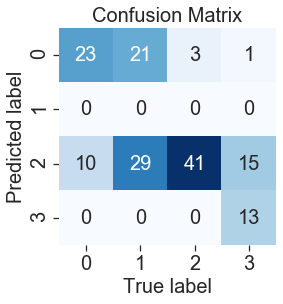

In [17]:
predictions=model1.predict(X_test)
accuracy_ = show_summary_report(y_test, predictions)

# Generating the Base First Level Models
The first level classification models can all be conveniently invoked via the Scikit-Learn library and are listed as follows:

Random Forest classifier

Extra Trees classifier

AdaBoost classifier

Gradient Boosting classifier

Support Vector classifier

# Parameters
A quick summary of the parameters:

n_jobs: Number of cores used for the training process. If set to -1, all cores are used. n_estimators: Number of classification trees in your learning model (set to 10 per default). max_depth: Maximum depth of tree, or how much a node should be expanded. Beware if set to too high a number would run the risk of overfitting as one would be growing the tree too deep. verbose: Controls whether to output any text during the learning process. A value of 0 suppresses all text while a value of 3 outputs the tree learning process at every iteration. Please check out the full description via the official Scikit-Learn website.

In [18]:
# Set the parameters for the classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    'warm_start': True,
#     'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'verbose': 0
}

# Extra Trees parameters
et_params = {
    'n_jobs': -1,
    'n_estimators': 500,
#     'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
#     'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
}

In the code below, a class `SklearnHelper` allows to extend the inbuilt methods (such as train, predict and fit) common to all the `Scikit-Learn` classifiers. This cuts out redundancy as it avoids to write the same methods many times when invoking many different classifiers.

In [20]:
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS, random_state = SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed = 0, params = None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, X_test):
        return self.clf.predict(X_test)
    
    def fit(self, X_train, y_train):
        return self.clf.fit(X_train, y_train)
    
    def feature_importances(self, X_train, y_train):
        return self.clf.fit(X_train, y_train).feature_importances_

In [21]:
rf  = SklearnHelper(clf = RandomForestClassifier,     seed = SEED, params = rf_params)
et  = SklearnHelper(clf = ExtraTreesClassifier,       seed = SEED, params = et_params)
ada = SklearnHelper(clf = AdaBoostClassifier,         seed = SEED, params = ada_params)
gb  = SklearnHelper(clf = GradientBoostingClassifier, seed = SEED, params = gb_params)
svc = SklearnHelper(clf = SVC,                        seed = SEED, params = svc_params)

# Out-of-Fold Predictions
Stacking uses predictions of base classifiers as input for training to a second level model.

However one cannot simply train the base models on the full training data, generate predictions on the full test set and then output these for the second level training.

This runs the risk of the base model predictions already having "seen" the test set and therefore overfitting when feeding these predictions.

In [22]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain, ))
    #print(oof_train)
    oof_test = np.zeros((ntest, ))
    #print(oof_train)
    oof_test_skf = np.empty((NFOLDS, ntest))
    #print(oof_test_skf)
    for i, (train_index, test_index) in enumerate(kf.split(x_train, y_train)):
        #global test_train_index
        #test_train_index=train_index
        #print(train_index)
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis = 0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [23]:
# Create the objects that represent our the models
rf  = SklearnHelper(clf = RandomForestClassifier,     seed = SEED, params = rf_params)
et  = SklearnHelper(clf = ExtraTreesClassifier,       seed = SEED, params = et_params)
ada = SklearnHelper(clf = AdaBoostClassifier,         seed = SEED, params = ada_params)
gb  = SklearnHelper(clf = GradientBoostingClassifier, seed = SEED, params = gb_params)
svc = SklearnHelper(clf = SVC,                        seed = SEED, params = svc_params)

In [24]:
y_train_array = y_train.values
x_train_array = X_train.values
x_test_array = X_test.values

In [25]:
# Create our OOF (Out-of-Fold) train and test predictions
# These base results will be used as new features
et_oof_train,  et_oof_test  = get_oof(et,  x_train_array, y_train_array, x_test_array) # Extra Trees
rf_oof_train,  rf_oof_test  = get_oof(rf,  x_train_array, y_train_array, x_test_array) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train_array, y_train_array, x_test_array) # AdaBoost 
gb_oof_train,  gb_oof_test  = get_oof(gb,  x_train_array, y_train_array, x_test_array) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc, x_train_array, y_train_array, x_test_array) # Support Vector Classifier

print('Training is complete')

Training is complete


# Feature importance from the different classifiers
The importance of the various features in the training and test sets is available from the first level classifiers with one very simple line of code.

As per the Scikit-Learn documentation, most of the classifiers are built in with an attribute which returns feature importances by refering to the .featureimportances_ attribute.

NOTE: SVC does not have the .featureimportances_ attribute.

In [27]:
# Create a dataframe with features
cols = X_train.columns.values
feature_dataframe = pd.DataFrame({
    'Feature':        cols,
    'Random Forest':  rf.feature_importances(x_train_array, y_train_array),
    'Extra Trees':    et.feature_importances(x_train_array, y_train_array),
    'AdaBoost':       ada.feature_importances(x_train_array, y_train_array),
    'Gradient Boost': gb.feature_importances(x_train_array, y_train_array)
})

In [28]:
feature_dataframe

,Feature,Random Forest,Extra Trees,AdaBoost,Gradient Boost
0,CustomerID,0.027462,0.019680,0.132,0.099755
1,Recency,0.090063,0.091132,0.018,0.049390
2,Frequency,0.121448,0.085168,0.036,0.132400
3,Payment,0.063739,0.029673,0.072,0.044827
4,Recency_RANK,0.071330,0.069735,0.018,0.047739
5,PCNT_RANK,0.097142,0.076714,0.024,0.047284
6,Ordered_Recency_Per,0.084250,0.073345,0.028,0.072066
7,Frequency_RANK,0.128575,0.176391,0.050,0.102843
8,Payement_RANK,0.067922,0.070113,0.042,0.052504
9,Total_Rank,0.054750,0.105337,0.118,0.075847


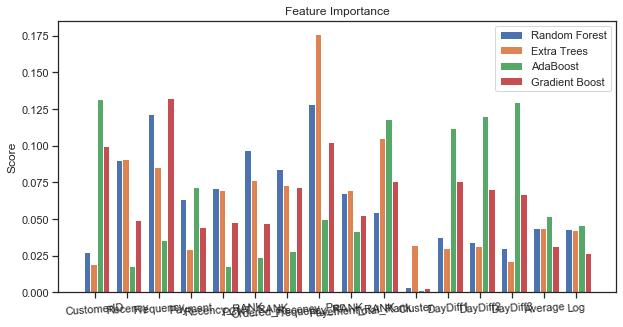

In [29]:
fig = plt.figure(figsize = (10, 5))

ind = np.arange(len(cols)) 
width = 0.2

for i, m in enumerate(feature_dataframe.columns[1:]):
    plt.bar(ind + ((i - 1 - width) * width), feature_dataframe[m], width, label = m)
    
plt.title('Feature Importance')
plt.xticks(ind, cols, rotation = 4)
plt.ylabel('Score')
plt.legend()
plt.show()

In [30]:
# Create a new column containing the average of values
feature_dataframe['Mean'] = feature_dataframe.mean(axis = 1) # axis = 1 computes the mean row-wise
feature_dataframe

,Feature,Random Forest,Extra Trees,AdaBoost,Gradient Boost,Mean
0,CustomerID,0.027462,0.019680,0.132,0.099755,0.069724
1,Recency,0.090063,0.091132,0.018,0.049390,0.062146
2,Frequency,0.121448,0.085168,0.036,0.132400,0.093754
3,Payment,0.063739,0.029673,0.072,0.044827,0.052560
4,Recency_RANK,0.071330,0.069735,0.018,0.047739,0.051701
5,PCNT_RANK,0.097142,0.076714,0.024,0.047284,0.061285
6,Ordered_Recency_Per,0.084250,0.073345,0.028,0.072066,0.064415
7,Frequency_RANK,0.128575,0.176391,0.050,0.102843,0.114452
8,Payement_RANK,0.067922,0.070113,0.042,0.052504,0.058135
9,Total_Rank,0.054750,0.105337,0.118,0.075847,0.088484


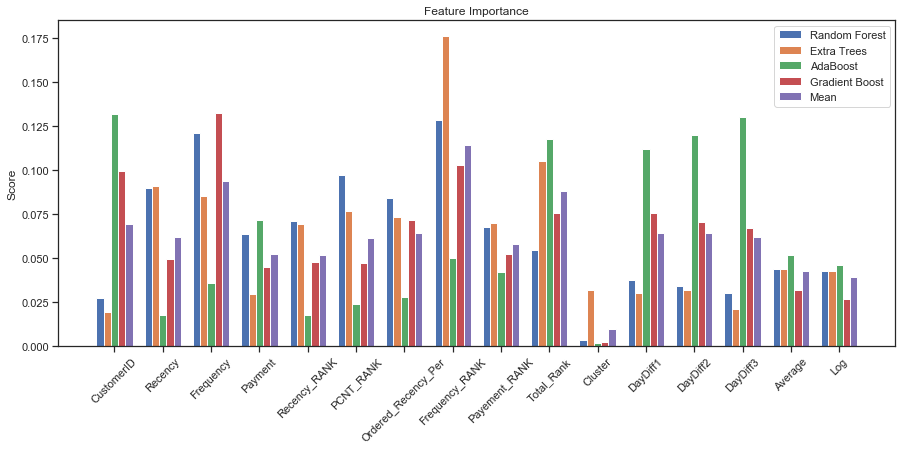

In [31]:
fig = plt.figure(figsize = (15, 6))

ind = np.arange(len(cols)) 
width = 0.15

for i, m in enumerate(feature_dataframe.columns[1:]):
    plt.bar(ind + ((i - 2) * width), feature_dataframe[m], width, label = m)

plt.title('Feature Importance')
plt.xticks(ind, cols, rotation = 45)
plt.ylabel('Score')
plt.legend()
plt.show()

*****************
* Random Forest *
*****************
Accuracy : 0.7246 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


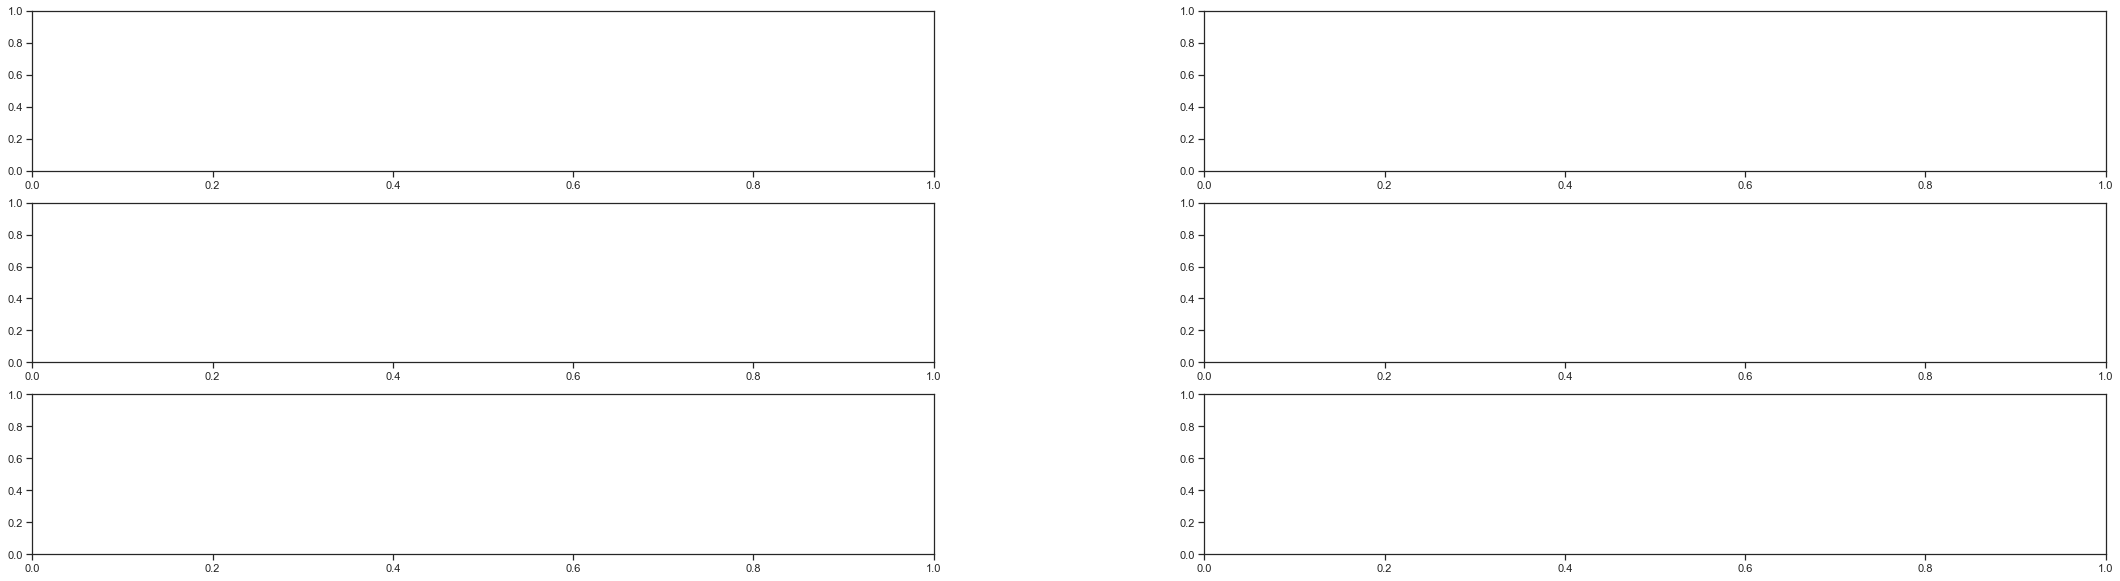

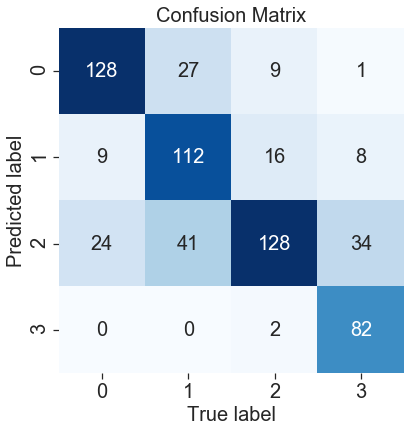


***************
* Extra Trees *
***************
Accuracy : 0.7923 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


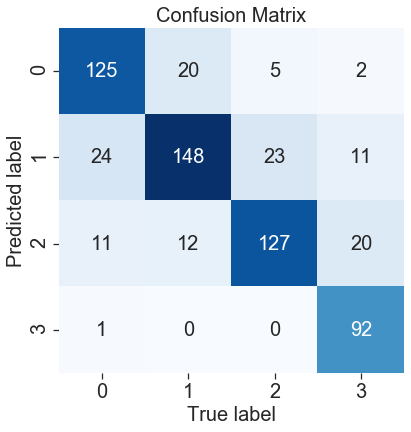


************
* AdaBoost *
************
Accuracy : 0.6715 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


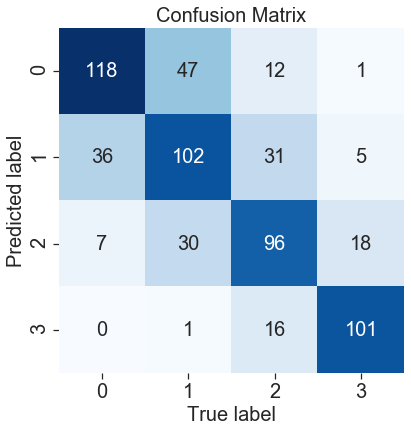


******************
* Gradient Boost *
******************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


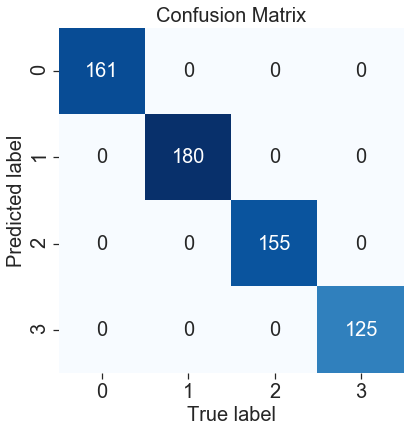


*****************************
* Support Vector Classifier *
*****************************
Accuracy : 0.5878 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


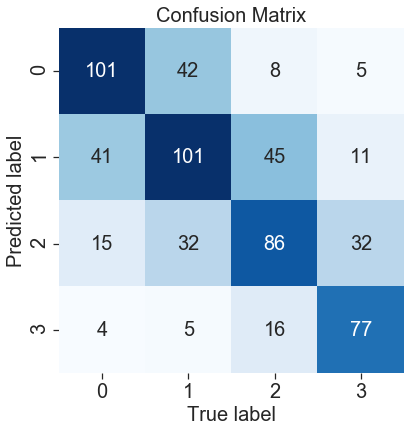

In [32]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy'])
fig, ax = plt.subplots(3, 2, figsize = (30,10))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.3)

models = ['Random Forest', 'Extra Trees', 'AdaBoost', 'Gradient Boost', 'Support Vector Classifier']
for i, m in enumerate([rf, et, ada, gb, svc]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(x_train_array)
    fig, ax = plt.subplots(3, 2, figsize = (5,10))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.3)
    # show the report
    accuracy_= show_summary_report(y_train_array, predictions)
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_}
    print()

# Second Level Predictions from the First Level Output
First level output as new features
One can think of building a new set of features from the first level predictions to be used as training data for the next classifier.

The code below have the first level predictions from the earlier classifiers as new columns and trains the next classifier from those.

In [33]:
base_predictions_train = pd.DataFrame({
    'RandomForest': rf_oof_train.ravel(),
    'ExtraTrees': et_oof_train.ravel(),
    'AdaBoost': ada_oof_train.ravel(),
    'GradientBoost': gb_oof_train.ravel()
})
print('Rows: %d, Columns: %d' % base_predictions_train.shape)
base_predictions_train.head()

Rows: 621, Columns: 4


,RandomForest,ExtraTrees,AdaBoost,GradientBoost
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,3.0,3.0,3.0,3.0


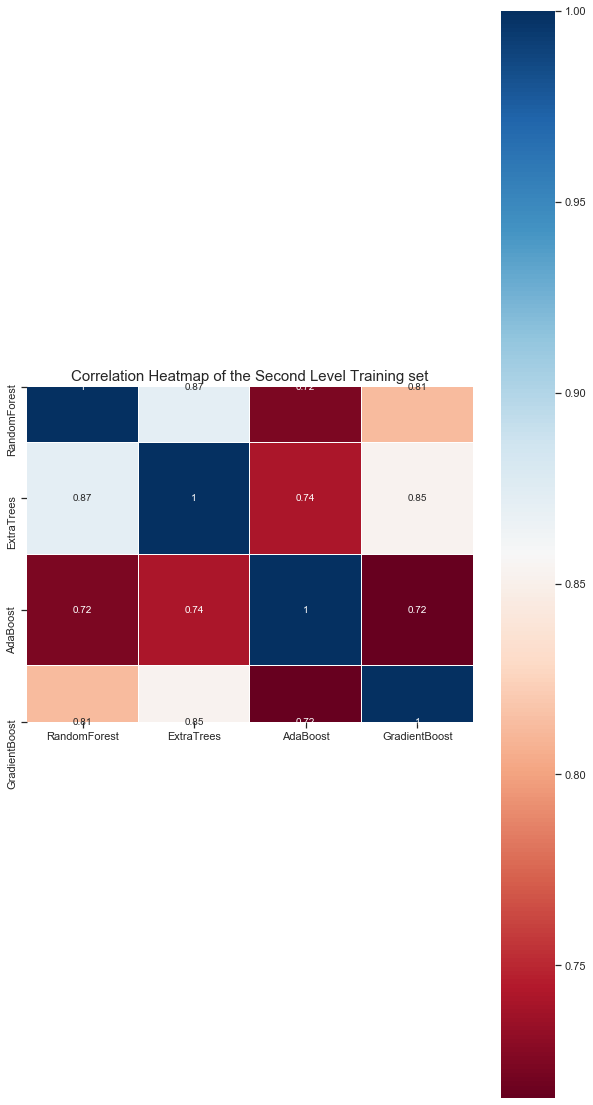

In [34]:
colormap = plt.cm.RdBu
plt.figure(figsize = (10, 20))
plt.title('Correlation Heatmap of the Second Level Training set', size = 15)
sns.heatmap(base_predictions_train.astype(float).corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = 'white',
            annot = True)
plt.show()

In [35]:
# Creates a new set of training and test data from the previous results results
xx_train = np.concatenate(
    (et_oof_train,
     rf_oof_train,
     ada_oof_train,
     gb_oof_train,
     svc_oof_train),
    axis = 1)
xx_test = np.concatenate(
    (et_oof_test,
     rf_oof_test,
     ada_oof_test,
     gb_oof_test,
     svc_oof_test),
    axis = 1)

# Second Level learning model via XGBoost
The XGBoost was built to optimize large-scale boosted tree algorithms.

The XGBoost parameters used in the model:

max_depth: How deep to grow the tree. Runs the risk of overfitting if set to too high.
gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger, the more conservative the algorithm will be.
eta: Step size shrinkage used in each boosting step to prevent overfitting.

In [36]:
gbm = xgb.XGBClassifier(
#     learning_rate = 0.02,
    n_estimators = 2000,
    max_depth = 4,
    min_child_weight = 2,
#     gamma = 1,
    gamma = 0.9,                        
    subsample = 0.8,
    colsample_bytree = 0.8,
    objective = 'binary:logistic',
    nthread = -1,
    scale_pos_weight = 1)

In [37]:
gbm.fit(xx_train, y_train)
predictions = gbm.predict(xx_train)

Accuracy : 0.7456 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


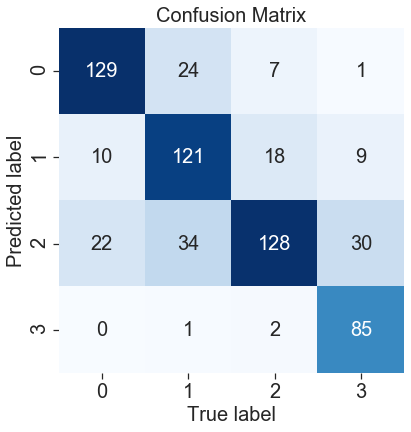

In [38]:
fig, ax = plt.subplots(3, 2, figsize = (5,10))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.3)
accuracy_ = show_summary_report(y_train, predictions)
# keep the results

results.loc[len(results)] = {
    'Model': 'XGBoost', 
    'Accuracy': accuracy_}
print()

In [39]:
results

,Model,Accuracy
0,Random Forest,0.724638
1,Extra Trees,0.792271
2,AdaBoost,0.671498
3,Gradient Boost,1.000000
4,Support Vector Classifier,0.587762
5,XGBoost,0.745572


*****************
* Random Forest *
*****************
Accuracy : 0.5064 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


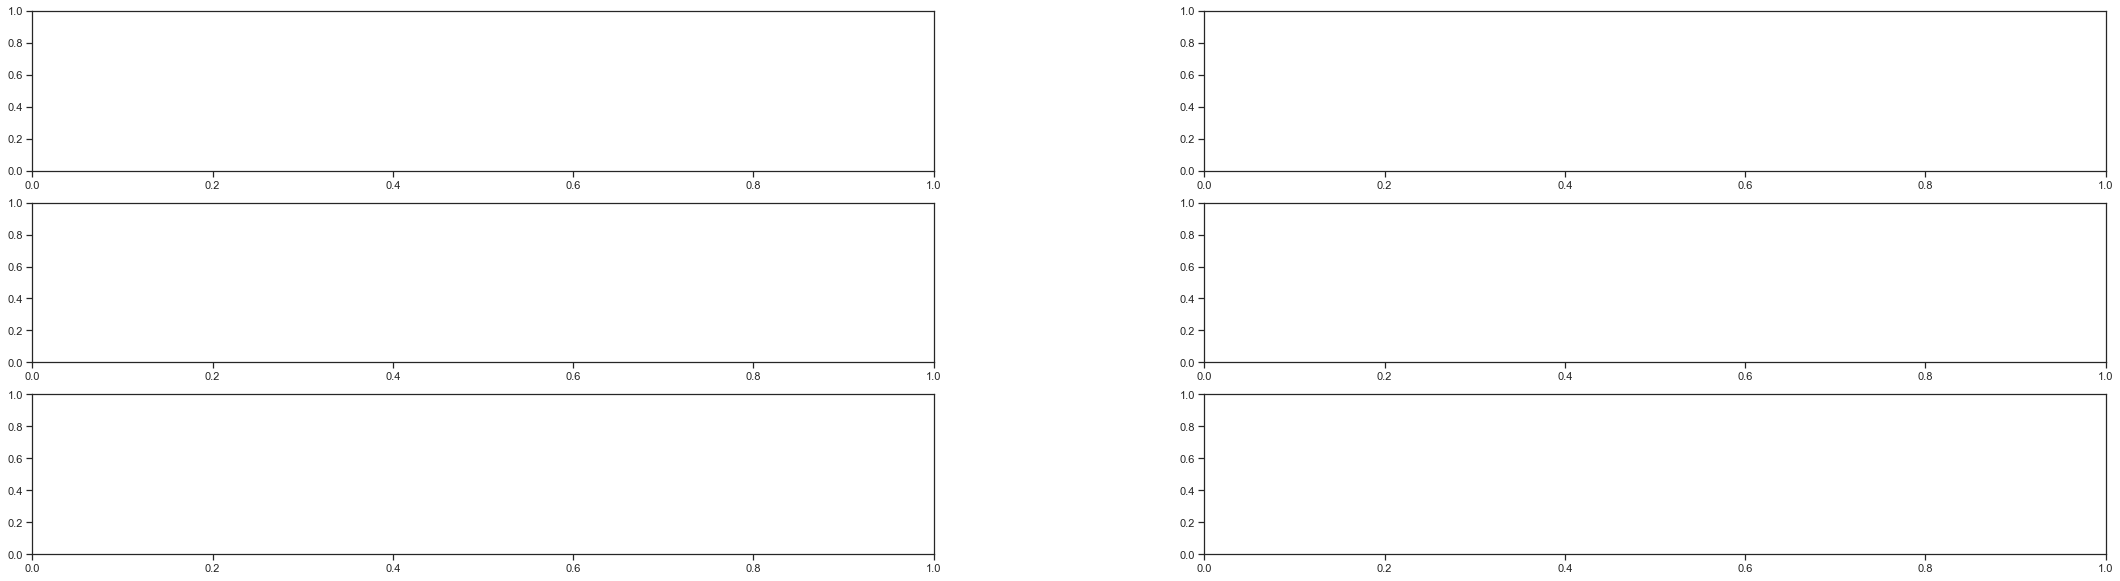

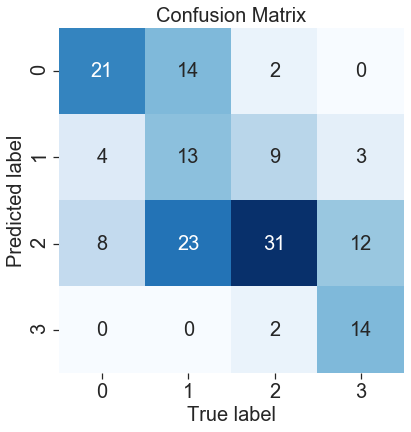


***************
* Extra Trees *
***************
Accuracy : 0.5577 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


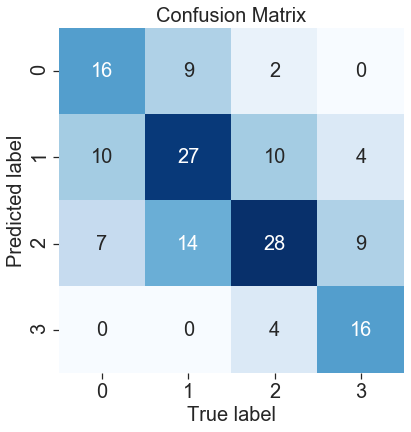


************
* AdaBoost *
************
Accuracy : 0.4679 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


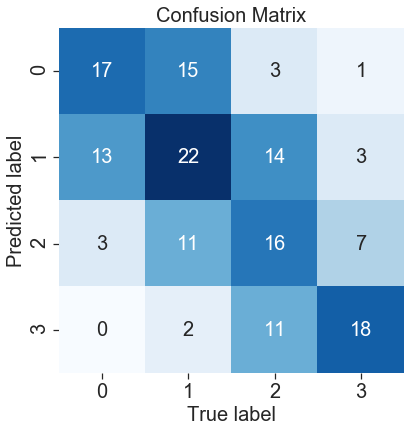


******************
* Gradient Boost *
******************
Accuracy : 0.4872 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


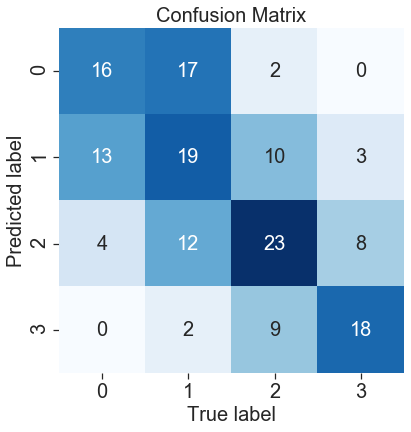


*****************************
* Support Vector Classifier *
*****************************
Accuracy : 0.5705 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


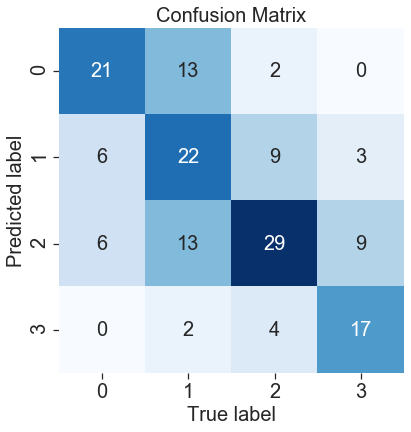

In [40]:
# Keep the results in a dataframe
results_Test = pd.DataFrame(columns = ['Model', 'Accuracy'])
fig, ax = plt.subplots(3, 2, figsize = (30,10))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.3)

models = ['Random Forest', 'Extra Trees', 'AdaBoost', 'Gradient Boost', 'Support Vector Classifier']
for i, m in enumerate([rf, et, ada, gb, svc]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(x_test_array)
    fig, ax = plt.subplots(3, 2, figsize = (5,10))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.3)
    # show the report
    accuracy_= show_summary_report(y_test, predictions)
    results_Test.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_}
    print()

In [41]:
predictions = gbm.predict(xx_test)

Accuracy : 0.4872 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0


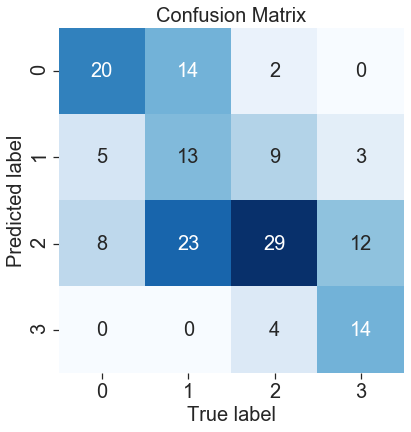

In [42]:
fig, ax = plt.subplots(3, 2, figsize = (5,10))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.3)
accuracy_ = show_summary_report(y_test, predictions)
results_Test.loc[len(results_Test)]={
    'Model': 'XGBoost', 
    'Accuracy': accuracy_}

In [43]:
results_Test

,Model,Accuracy
0,Random Forest,0.506410
1,Extra Trees,0.557692
2,AdaBoost,0.467949
3,Gradient Boost,0.487179
4,Support Vector Classifier,0.570513
5,XGBoost,0.487179


In [44]:
data

,CustomerID,InvoiceDate,Recency,Frequency,Payment,Recency_RANK,PCNT_RANK,Ordered_Recency_Per,Frequency_RANK,Payement_RANK,...,CLTV,Cluster,InvoiceDay,DayDiff1,DayDiff2,DayDiff3,NextPurchaseDay_TestPeriod,NextPurchaseDayRange,Average,Log
0,12888.0,2011-05-09 16:02:00,214,2,313.77,3322.0,0.847233,0.152767,0.534813,0.282071,...,0,0,2011-05-09,6.0,32.0,3.0,999.0,3,13.666667,2.614960
1,13420.0,2011-07-13 08:48:00,149,2,140.35,2976.0,0.758990,0.241010,0.534813,0.092833,...,0,0,2011-07-28,15.0,7.0,14.0,999.0,3,12.000000,2.484907
2,15107.0,2011-02-01 14:46:00,311,6,247.66,3735.0,0.952563,0.047437,0.838562,0.212956,...,1,0,2011-02-01,19.0,2.0,2.0,999.0,3,7.666667,2.036882
3,15646.0,2011-07-05 09:53:00,157,3,425.14,3024.0,0.771232,0.228768,0.653405,0.383831,...,1,0,2011-07-05,85.0,4.0,126.0,999.0,3,71.666667,4.272026
4,15648.0,2011-05-19 15:53:00,204,2,599.90,3275.0,0.835246,0.164754,0.534813,0.478449,...,1,0,2011-05-19,44.0,6.0,13.0,999.0,3,21.000000,3.044522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,16566.0,2011-11-24 16:34:00,15,5,614.01,882.0,0.224943,0.775057,0.798266,0.488906,...,2,1,2011-06-22,20.0,2.0,100.0,113.0,2,40.666667,3.705409
773,16668.0,2011-11-24 17:43:00,15,6,306.72,882.0,0.224943,0.775057,0.838562,0.270849,...,2,1,2011-07-24,44.0,32.0,70.0,21.0,0,48.666667,3.884994
774,17115.0,2011-12-01 14:30:00,8,3,806.90,560.0,0.142821,0.857179,0.653405,0.578934,...,2,1,2011-06-13,3.0,44.0,7.0,999.0,3,18.000000,2.890372
775,17526.0,2011-12-05 11:05:00,4,4,706.70,378.0,0.096404,0.903596,0.742923,0.540933,...,2,1,2011-05-19,49.0,37.0,70.0,999.0,3,52.000000,3.951244


In [45]:
data1=data

In [47]:
data1['Cluster'].value_counts()

3    546
2    204
0     21
1      6
Name: Cluster, dtype: int64

In [48]:
plot_frequency1=data1
plot_frequency1=data1[data1['Cluster']>1]

In [49]:
plot_frequency1

,CustomerID,InvoiceDate,Recency,Frequency,Payment,Recency_RANK,PCNT_RANK,Ordered_Recency_Per,Frequency_RANK,Payement_RANK,...,CLTV,Cluster,InvoiceDay,DayDiff1,DayDiff2,DayDiff3,NextPurchaseDay_TestPeriod,NextPurchaseDayRange,Average,Log
21,12747.0,2011-12-07 14:34:00,2,11,4196.01,208.0,0.053048,0.946952,0.933435,0.930630,...,3,3,2011-06-28,34.0,20.0,65.0,55.0,1,39.666667,3.680511
22,12748.0,2011-12-09 12:20:00,0,210,29072.10,28.0,0.007141,0.992859,1.000000,0.994644,...,3,3,2011-07-31,2.0,1.0,7.0,2.0,0,3.333333,1.203973
23,12826.0,2011-12-07 10:25:00,2,7,1468.12,208.0,0.053048,0.946952,0.871716,0.738842,...,3,3,2011-06-24,10.0,138.0,8.0,107.0,2,52.000000,3.951244
24,12830.0,2011-11-02 11:54:00,37,6,6748.40,1702.0,0.434073,0.565927,0.838562,0.965570,...,3,3,2011-07-28,7.0,15.0,15.0,42.0,1,12.333333,2.512306
25,12839.0,2011-12-07 12:33:00,2,14,5583.62,208.0,0.053048,0.946952,0.956134,0.952818,...,3,3,2011-07-29,24.0,26.0,15.0,19.0,0,21.666667,3.075775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,18231.0,2011-05-31 14:18:00,192,5,2066.17,3217.0,0.820454,0.179546,0.798266,0.817138,...,2,2,2011-05-31,43.0,5.0,28.0,999.0,3,25.333333,3.232121
767,18232.0,2011-09-19 11:49:00,81,4,582.47,2529.0,0.644989,0.355011,0.742923,0.467738,...,1,2,2011-07-05,32.0,3.0,5.0,76.0,2,13.333333,2.590267
768,18239.0,2011-05-05 12:38:00,218,5,1561.61,3353.0,0.855139,0.144861,0.798266,0.755164,...,2,2,2011-05-05,42.0,52.0,10.0,999.0,3,34.666667,3.545779
769,18257.0,2011-10-31 14:48:00,39,8,2265.38,1744.0,0.444784,0.555216,0.893905,0.837031,...,2,2,2011-06-24,23.0,9.0,6.0,54.0,1,12.666667,2.538974


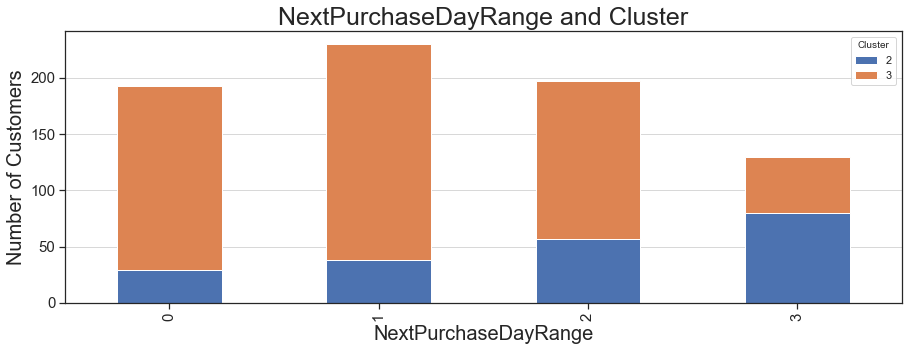

In [51]:
plot_frequency1.groupby(['NextPurchaseDayRange', 'Cluster']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title('NextPurchaseDayRange and Cluster',fontsize=25)
plt.xlabel('NextPurchaseDayRange',fontsize=20)
plt.ylabel('Number of Customers',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', alpha=0.75)

# Extra code to get the sales increase¶

In [53]:
#Considering value from cluster 2 for value dectection

value=data1[data1['Cluster']==2]

In [54]:
value

,CustomerID,InvoiceDate,Recency,Frequency,Payment,Recency_RANK,PCNT_RANK,Ordered_Recency_Per,Frequency_RANK,Payement_RANK,...,CLTV,Cluster,InvoiceDay,DayDiff1,DayDiff2,DayDiff3,NextPurchaseDay_TestPeriod,NextPurchaseDayRange,Average,Log
567,12840.0,2011-07-19 09:29:00,143,4,2714.27,2948.0,0.751849,0.248151,0.742923,0.869931,...,2,2,2011-07-19,39.0,32.0,4.0,999.0,3,25.000000,3.218876
568,12845.0,2011-03-17 13:34:00,267,4,354.09,3574.0,0.911502,0.088498,0.742923,0.325682,...,1,2,2011-03-17,1.0,2.0,20.0,999.0,3,7.666667,2.036882
569,12853.0,2011-07-28 11:29:00,134,6,1881.70,2905.0,0.740882,0.259118,0.838562,0.797756,...,2,2,2011-07-28,80.0,25.0,73.0,999.0,3,59.333333,4.083171
570,12868.0,2011-06-07 10:42:00,185,6,1607.06,3179.0,0.810763,0.189237,0.838562,0.759245,...,2,2,2011-06-07,33.0,50.0,48.0,999.0,3,43.666667,3.776585
571,12916.0,2011-07-24 10:35:00,138,4,2982.35,2929.0,0.747003,0.252997,0.742923,0.884723,...,2,2,2011-07-24,63.0,56.0,63.0,999.0,3,60.666667,4.105394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,18231.0,2011-05-31 14:18:00,192,5,2066.17,3217.0,0.820454,0.179546,0.798266,0.817138,...,2,2,2011-05-31,43.0,5.0,28.0,999.0,3,25.333333,3.232121
767,18232.0,2011-09-19 11:49:00,81,4,582.47,2529.0,0.644989,0.355011,0.742923,0.467738,...,1,2,2011-07-05,32.0,3.0,5.0,76.0,2,13.333333,2.590267
768,18239.0,2011-05-05 12:38:00,218,5,1561.61,3353.0,0.855139,0.144861,0.798266,0.755164,...,2,2,2011-05-05,42.0,52.0,10.0,999.0,3,34.666667,3.545779
769,18257.0,2011-10-31 14:48:00,39,8,2265.38,1744.0,0.444784,0.555216,0.893905,0.837031,...,2,2,2011-06-24,23.0,9.0,6.0,54.0,1,12.666667,2.538974


In [55]:
value['Payment'].min()

354.0900000000001

In [56]:
value['Payment'].mean()

1862.9048039215684

In [59]:
value1=data1[data1['Cluster']==3]
value1['Payment'].min()

488.03

In [60]:
value1['Payment'].mean()

7134.887692307697

In [61]:
value1

,CustomerID,InvoiceDate,Recency,Frequency,Payment,Recency_RANK,PCNT_RANK,Ordered_Recency_Per,Frequency_RANK,Payement_RANK,...,CLTV,Cluster,InvoiceDay,DayDiff1,DayDiff2,DayDiff3,NextPurchaseDay_TestPeriod,NextPurchaseDayRange,Average,Log
21,12747.0,2011-12-07 14:34:00,2,11,4196.01,208.0,0.053048,0.946952,0.933435,0.930630,...,3,3,2011-06-28,34.0,20.0,65.0,55.0,1,39.666667,3.680511
22,12748.0,2011-12-09 12:20:00,0,210,29072.10,28.0,0.007141,0.992859,1.000000,0.994644,...,3,3,2011-07-31,2.0,1.0,7.0,2.0,0,3.333333,1.203973
23,12826.0,2011-12-07 10:25:00,2,7,1468.12,208.0,0.053048,0.946952,0.871716,0.738842,...,3,3,2011-06-24,10.0,138.0,8.0,107.0,2,52.000000,3.951244
24,12830.0,2011-11-02 11:54:00,37,6,6748.40,1702.0,0.434073,0.565927,0.838562,0.965570,...,3,3,2011-07-28,7.0,15.0,15.0,42.0,1,12.333333,2.512306
25,12839.0,2011-12-07 12:33:00,2,14,5583.62,208.0,0.053048,0.946952,0.956134,0.952818,...,3,3,2011-07-29,24.0,26.0,15.0,19.0,0,21.666667,3.075775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,18230.0,2011-11-30 13:22:00,9,7,2716.60,621.0,0.158378,0.841622,0.871716,0.870186,...,3,3,2011-06-19,34.0,45.0,50.0,79.0,2,43.000000,3.761200
563,18241.0,2011-11-30 12:10:00,9,17,2058.09,621.0,0.158378,0.841622,0.969141,0.816118,...,3,3,2011-07-27,29.0,12.0,41.0,7.0,0,27.333333,3.308107
564,18245.0,2011-12-02 14:48:00,7,7,2507.56,485.0,0.123693,0.876307,0.871716,0.854884,...,3,3,2011-07-13,62.0,94.0,7.0,999.0,3,54.333333,3.995138
565,18272.0,2011-12-07 12:43:00,2,6,3064.78,208.0,0.053048,0.946952,0.838562,0.888294,...,3,3,2011-07-12,62.0,13.0,21.0,36.0,1,32.000000,3.465736


In [62]:
(value1['Payment'].mean()-value['Payment'].mean())*value['Payment'].count()

1075484.5092307702

In [63]:
(value1['Payment'].min()-value['Payment'].min())*value['Payment'].count()

27323.759999999977

In [65]:
filter1=data1['Cluster']==3
filter2=data1['NextPurchaseDayRange']==1
Value3=data1[filter1 & filter2]

In [66]:
filter1=data1['Cluster']==3
filter2=data1['NextPurchaseDayRange']==0
Value4=data1[filter1 & filter2]

In [67]:
Value3['Payment'].sum()

1064970.0

In [68]:
Value4['Payment'].sum()

2237335.5500000007

In [69]:
#Sales increase in percentage
((Value4['Payment'].sum()-Value3['Payment'].sum())*100)/Value4['Payment'].sum()

52.40007695761149

In [71]:
customer_ds = pd.read_excel('C:/Users/Jewin/Desktop/Jovita-DataSciene/DATA/Capstone/Online Retail.xlsx')

In [72]:
end_date=date(2011,11,1)

In [73]:
revenue=customer_ds[customer_ds['InvoiceDate']>end_date]

In [74]:
revenue

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
431673,573744,21314,SMALL GLASS HEART TRINKET POT,8,2011-11-01 08:16:00,2.10,17733.0,United Kingdom
431674,573744,21704,BAG 250g SWIRLY MARBLES,12,2011-11-01 08:16:00,0.85,17733.0,United Kingdom
431675,573744,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-11-01 08:16:00,1.25,17733.0,United Kingdom
431676,573744,21892,TRADITIONAL WOODEN CATCH CUP GAME,12,2011-11-01 08:16:00,1.25,17733.0,United Kingdom
431677,573744,21915,RED HARMONICA IN BOX,12,2011-11-01 08:16:00,1.25,17733.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [75]:
revenue2=pd.merge(revenue, data[['CustomerID','Cluster','NextPurchaseDayRange']],on='CustomerID',how='right')

In [76]:
revenue2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster,NextPurchaseDayRange
0,573745,21174,POTTERING IN THE SHED METAL SIGN,12.0,2011-11-01 08:53:00,2.08,17419.0,United Kingdom,3,2
1,573745,21876,POTTERING MUG,12.0,2011-11-01 08:53:00,1.65,17419.0,United Kingdom,3,2
2,573745,21890,S/6 WOODEN SKITTLES IN COTTON BAG,6.0,2011-11-01 08:53:00,3.25,17419.0,United Kingdom,3,2
3,573745,21892,TRADITIONAL WOODEN CATCH CUP GAME,12.0,2011-11-01 08:53:00,1.25,17419.0,United Kingdom,3,2
4,573745,21915,RED HARMONICA IN BOX,12.0,2011-11-01 08:53:00,1.25,17419.0,United Kingdom,3,2
...,...,...,...,...,...,...,...,...,...,...
29200,NaN,NaN,NaN,NaN,NaT,NaN,18231.0,NaN,2,3
29201,NaN,NaN,NaN,NaN,NaT,NaN,18232.0,NaN,2,2
29202,NaN,NaN,NaN,NaN,NaT,NaN,18239.0,NaN,2,3
29203,NaN,NaN,NaN,NaN,NaT,NaN,18257.0,NaN,2,1


In [77]:
filter1=revenue2['Cluster']==3
filter2=revenue2['NextPurchaseDayRange']==1
Value5=revenue2[filter1 & filter2]

filter1=revenue2['Cluster']==3
filter2=revenue2['NextPurchaseDayRange']==0
Value6=revenue2[filter1 & filter2]

In [79]:
Value5['payment_value']=Value5['Quantity']*Value5['UnitPrice']

In [80]:
Value6['payment_value']=Value6['Quantity']*Value6['UnitPrice']

In [81]:
Value5['payment_value'].sum()

169590.56

In [82]:
Value6['payment_value'].sum()

366214.97

In [83]:
Value5['payment_value'].count()

7444